DATASET PREPARATION

In [1]:
import numpy as np
import os
from os import listdir
from pathlib import Path
import keras.utils as image
import glob

In [2]:
folder_dir=r"C:\Users\91893\machine learning\Image Classification\images"
p=Path(folder_dir)
dirs=p.glob("*")
labels_dict={"cat":0,"horse":1,"human":2}
 
image_data=[]
labels=[]
for folder_name in dirs:
    label=str(folder_name).split("\\")[-1][:-1]
    
    for img_path in folder_name.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(10,10))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
    
    for img_path in folder_name.glob("*.png"):
        img=image.load_img(img_path,target_size=(10,10))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [3]:
#convert data 
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)

X=np.array(image_data)
Y=np.array(labels)

from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)

In [4]:
#Visualise the data
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()

In [5]:
#Create Training and Testing data
split=int(X.shape[0]*0.8)

X_=np.array(X)
Y_=np.array(Y)

#Training set
X=X_[:split,:]
Y=Y_[:split]

#Testing set
Xtest=X_[split:,:]
Ytest=Y_[split:]


In [6]:
def softmax(a):
    e=np.exp(a) #vector
    ans=e/np.sum(e,axis=1,keepdims=True)  #keepdims allows it to be linear array
    return ans

In [7]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        #For first layer
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        #For second layer
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        #For final layer
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model 
        self.activation_output_=None
        
    #Forward Propogation
    def forward(self,x):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        return y_
    
    #Backward Propogation
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        
        a1,a2,y_=self.activation_outputs
        
        #we will start by computing error in the final step
        delta3=y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        
        #Update the model parameters using Gradient Descent
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['W3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_=self.activation_outputs
        
        print("W1",W1.shape)
        print('A1',a1.shape)
        
        print("W2",W2.shape)
        print('A2',a2.shape)
        
        print("W3",W3.shape)
        print('A3',y_.shape)
        

In [8]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=len(np.unique(Y))
    Y_OHT=one_hot(Y,classes)
    
    for i in range(epochs):
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)

    return training_loss

In [9]:
model=NeuralNetwork(input_size=300,layers=[100,50],output_size=3)

In [10]:
X=X.reshape(X.shape[0],-1)
Xtest=Xtest.reshape(Xtest.shape[0],-1)

In [11]:
l=train(X,Y,model,500,0.0001)

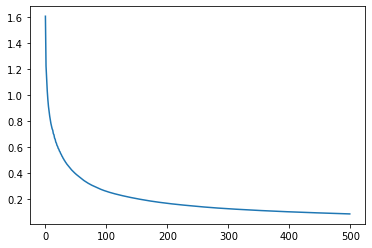

In [12]:
import matplotlib.pyplot as plt
plt.plot(l)
plt.show()

In [13]:
def getAccuracy(X,Y,model):
    outputs=model.predict(X)
    acc=np.sum(outputs==Y)/Y.shape[0]
    return acc

In [14]:
getAccuracy(X,Y,model)

0.9254709254709255

In [15]:
getAccuracy(Xtest,Ytest,model)

0.6274509803921569

In [16]:
 #here the data is getting overfitted

OverFitting Computations

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(model.predict(X),Y))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       403
           1       0.91      0.92      0.92       395
           2       0.94      0.94      0.94       423

    accuracy                           0.93      1221
   macro avg       0.93      0.93      0.93      1221
weighted avg       0.93      0.93      0.93      1221



In [19]:
#Visualise misclassifications
outputs=model.predict(X)
for i in range(Y.shape[0]):
    if Y[i]!=outputs[i]:
        pass
        #drawImg(X[i].reshape(20,20,3))
        #print (Y[i],outputs[i])

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [21]:
cnf_matrix=confusion_matrix(outputs,Y)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)

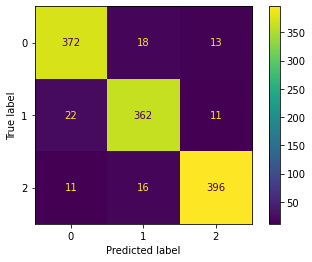

In [22]:
cm_display.plot()
plt.show()